In [65]:
import numpy as np
import pandas as pd
import main
import seaborn as sns
data_for_analize = pd.read_csv(main.data_dir + '\\data_for_analize.csv', delimiter=';')
data_for_analize.head()

,UWI,aps,kgl,kng,kno,kp,kpr,rp,satur,well_name,date_start,wc,X-Coord,Y-Coord
0,314_342,0.322467,0.193235,0.012291,0.197897,0.138767,14.150157,24.286652,0.566677,554,01.06.2008,0.08,351657.56,6464689.29
1,314_324,0.265558,0.247047,0.018836,0.132816,0.105022,2.539692,20.955415,0.455736,536,01.08.2009,0.26,352508.25,6467277.77
2,314_320,0.280630,0.248633,0.021536,0.123196,0.108707,5.566618,27.123303,0.438042,532,01.01.2010,0.30,352508.25,6467304.77
3,314_351,0.251225,0.247385,0.014797,0.080020,0.108428,1.034750,19.006996,0.363576,563,01.06.2010,0.33,349963.39,6464172.47
4,314_381,0.309972,0.222660,0.028106,0.160185,0.123135,8.561217,17.427380,0.574928,593,01.04.2010,0.25,351543.76,6464555.85


In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

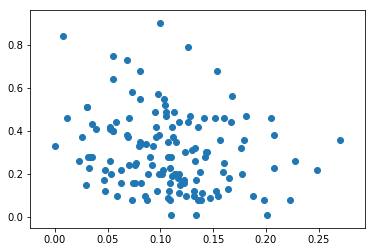

In [84]:
# зависимость обводненности от нефтенасыщенности 
x_coord = data_for_analize['kno']
y_coord = data_for_analize['wc']
plt.scatter(x_coord, y_coord)

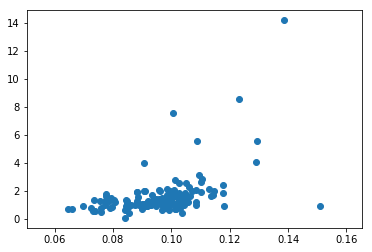

In [85]:
# зависимость пористости от проницаемости 
x_coord = data_for_analize['kp']
y_coord = data_for_analize['kpr']
plt.scatter(x_coord, y_coord)

In [67]:
y = data_for_analize['wc']
# y_r = int(10) * round(y,1)
y_r = []
for val in y:
    y_r.append(int(10*val))
print(y, y_r)

0      0.08
1      0.26
2      0.30
3      0.33
4      0.25
5      0.20
6      0.36
7      0.52
8      0.42
9      0.22
10     0.28
11     0.46
12     0.47
13     0.12
14     0.12
15     0.23
16     0.12
17     0.40
18     0.26
19     0.15
20     0.34
21     0.20
22     0.30
23     0.73
24     0.10
25     0.35
26     0.16
27     0.20
28     0.41
29     0.68
       ... 
109    0.36
110    0.75
111    0.44
112    0.79
113    0.28
114    0.44
115    0.34
116    0.20
117    0.17
118    0.37
119    0.01
120    0.33
121    0.01
122    0.16
123    0.10
124    0.46
125    0.17
126    0.01
127    0.08
128    0.23
129    0.26
130    0.22
131    0.08
132    0.09
133    0.64
134    0.10
135    0.12
136    0.13
137    0.10
138    0.33
Name: wc, dtype: float64 [0, 2, 3, 3, 2, 2, 3, 5, 4, 2, 2, 4, 4, 1, 1, 2, 1, 4, 2, 1, 3, 2, 3, 7, 1, 3, 1, 2, 4, 6, 0, 2, 4, 5, 4, 2, 1, 4, 4, 4, 4, 2, 4, 2, 3, 1, 2, 3, 1, 2, 8, 3, 2, 1, 0, 2, 3, 1, 2, 3, 3, 4, 3, 1, 5, 0, 3, 1, 4, 1, 1, 4, 2, 2, 3, 5, 4, 3, 4, 0, 2,

In [68]:
data_for_analize_scale = data_for_analize.copy() 
data_for_analize_scale['wc']=y_r

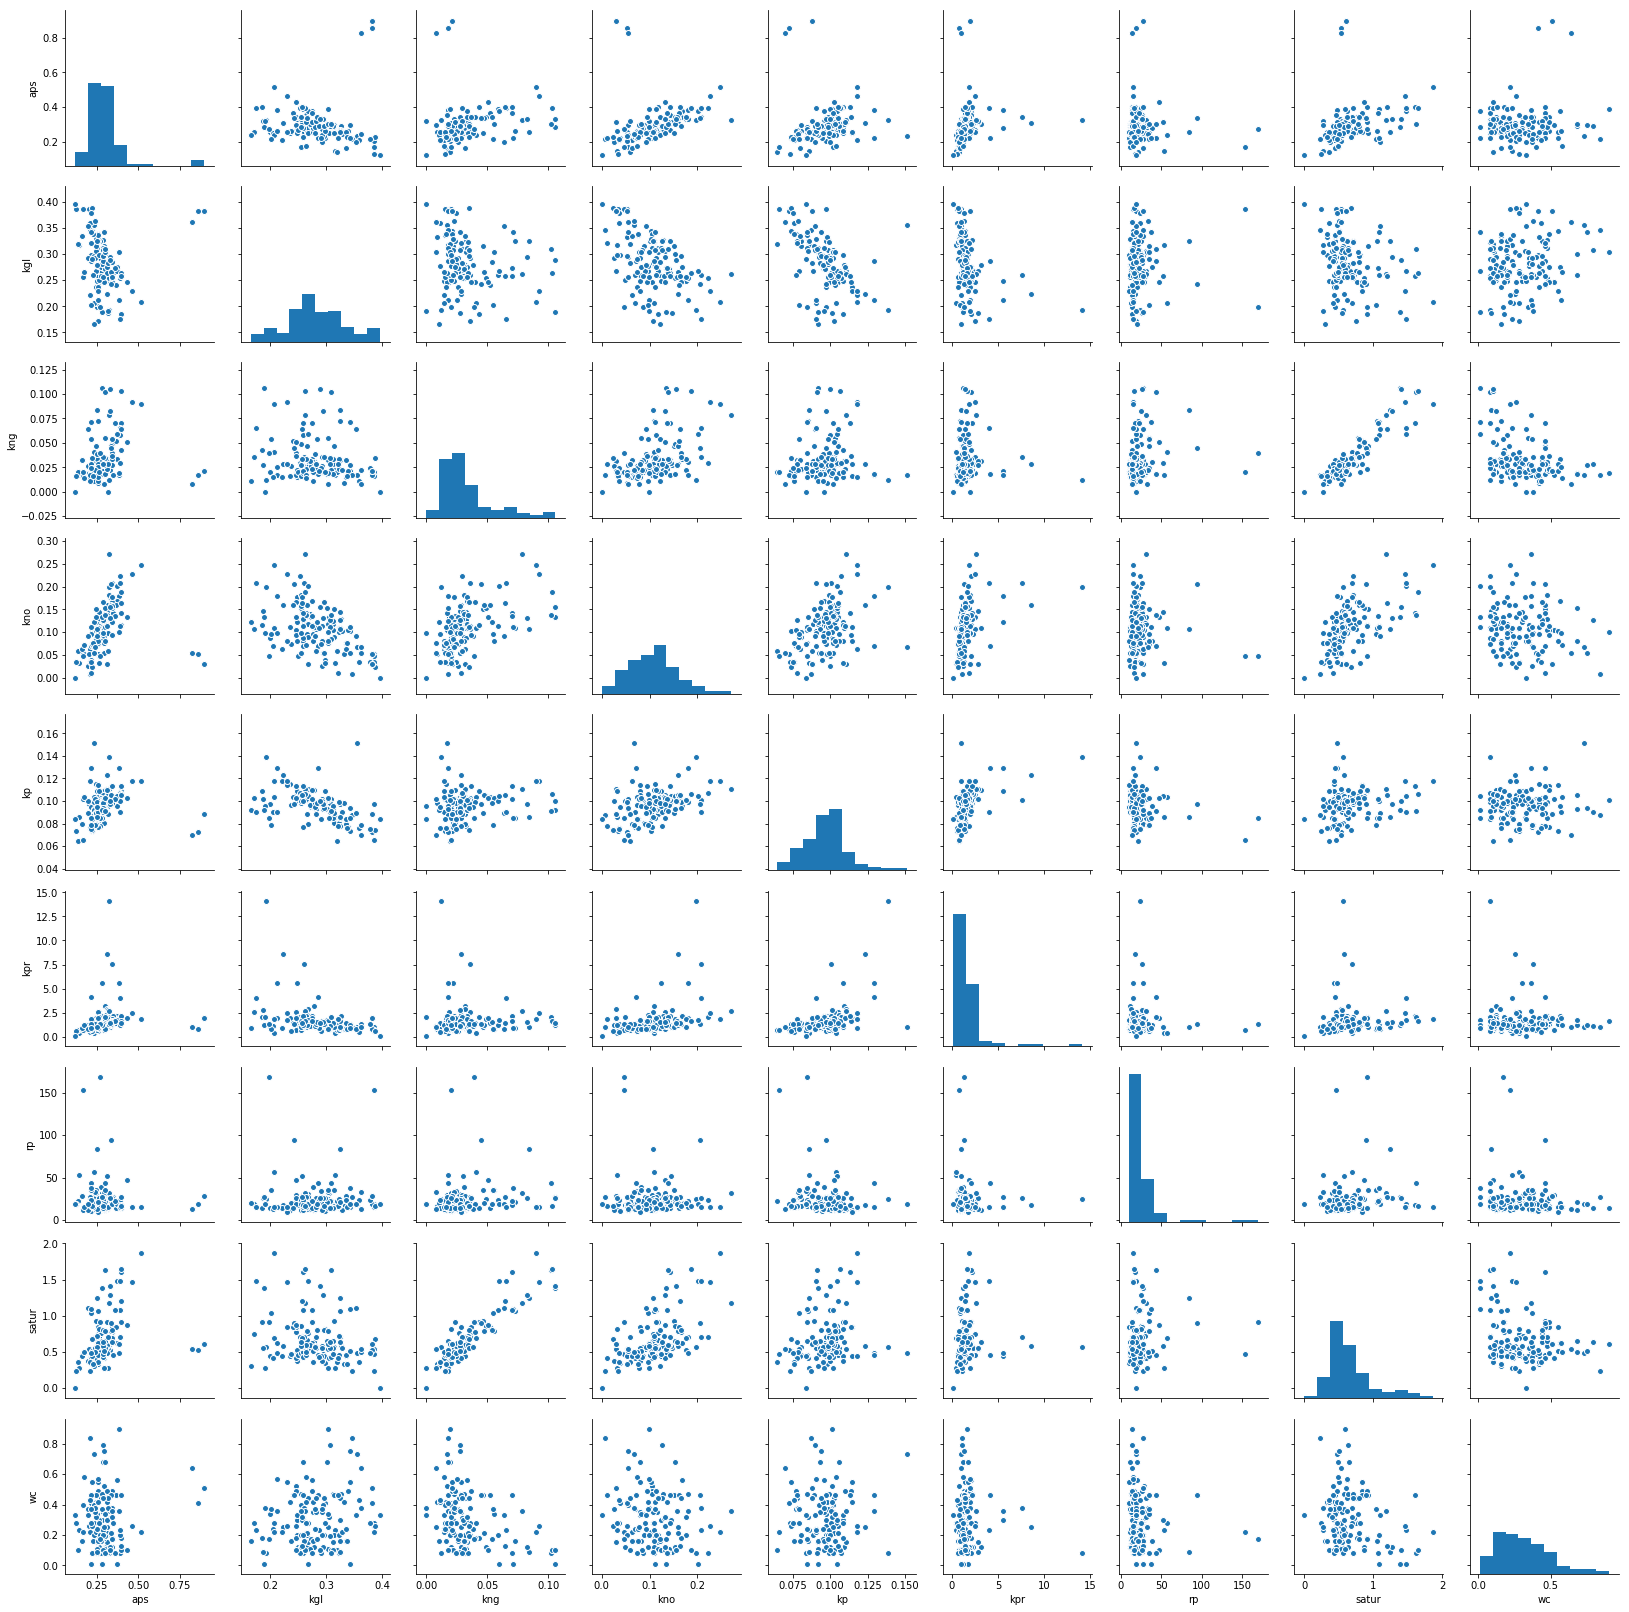

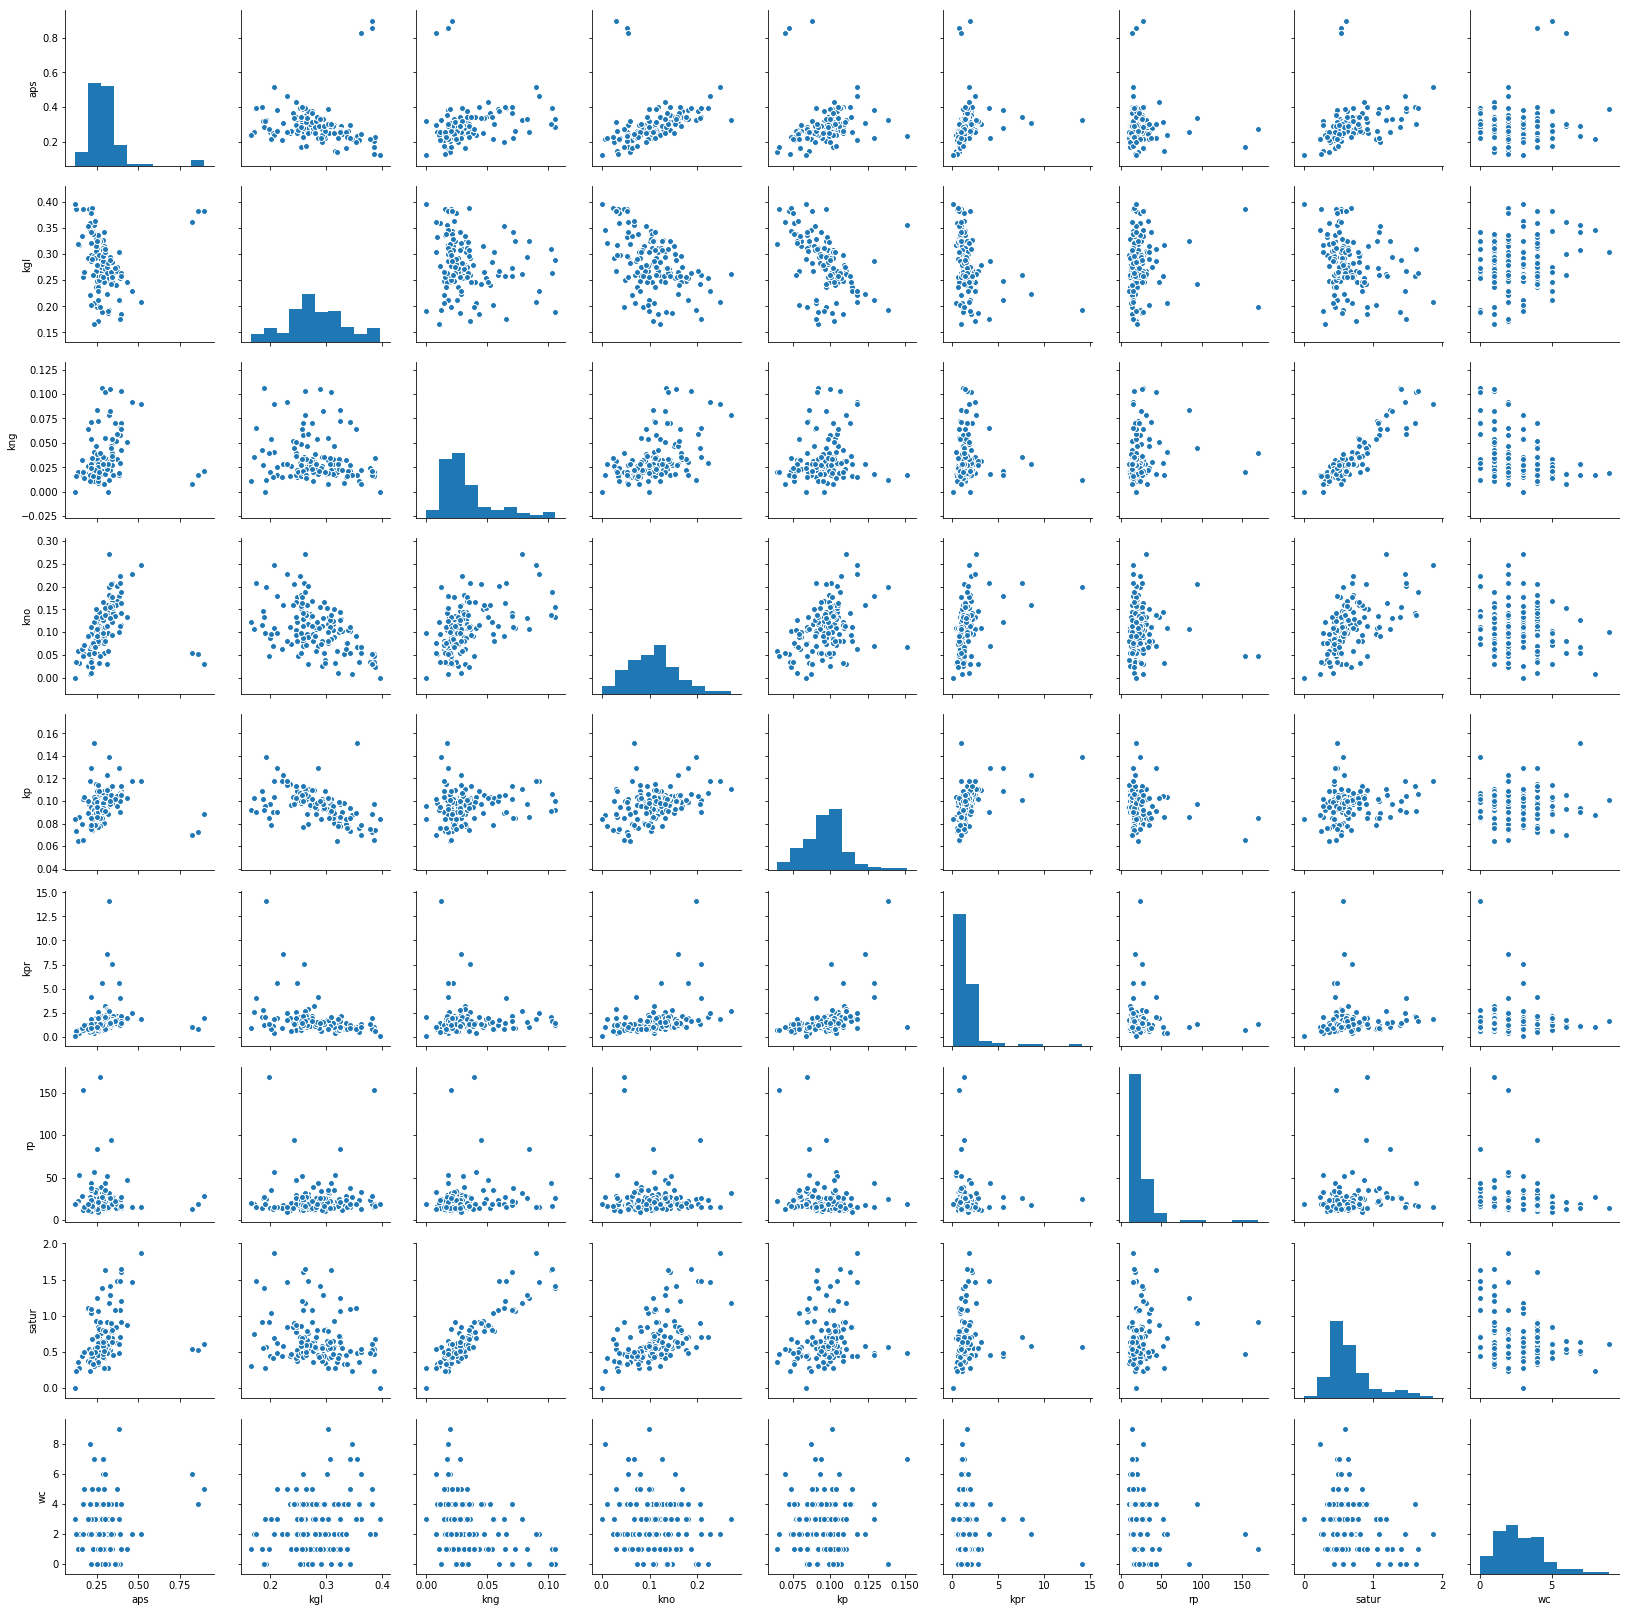

In [71]:
cols = ['aps', 'kgl', 'kng', 'kno', 'kp', 'kpr', 'rp', 'satur', 'wc']
sns_plot = sns.pairplot(data_for_analize[cols])
sns_plot.savefig(main.data_dir + '\\pairplot_original.png')
sns_plot = sns.pairplot(data_for_analize_scale[cols])
sns_plot.savefig(main.data_dir + '\\pairplot_scale.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003F105F1D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000003F121E9D30>]], dtype=object)

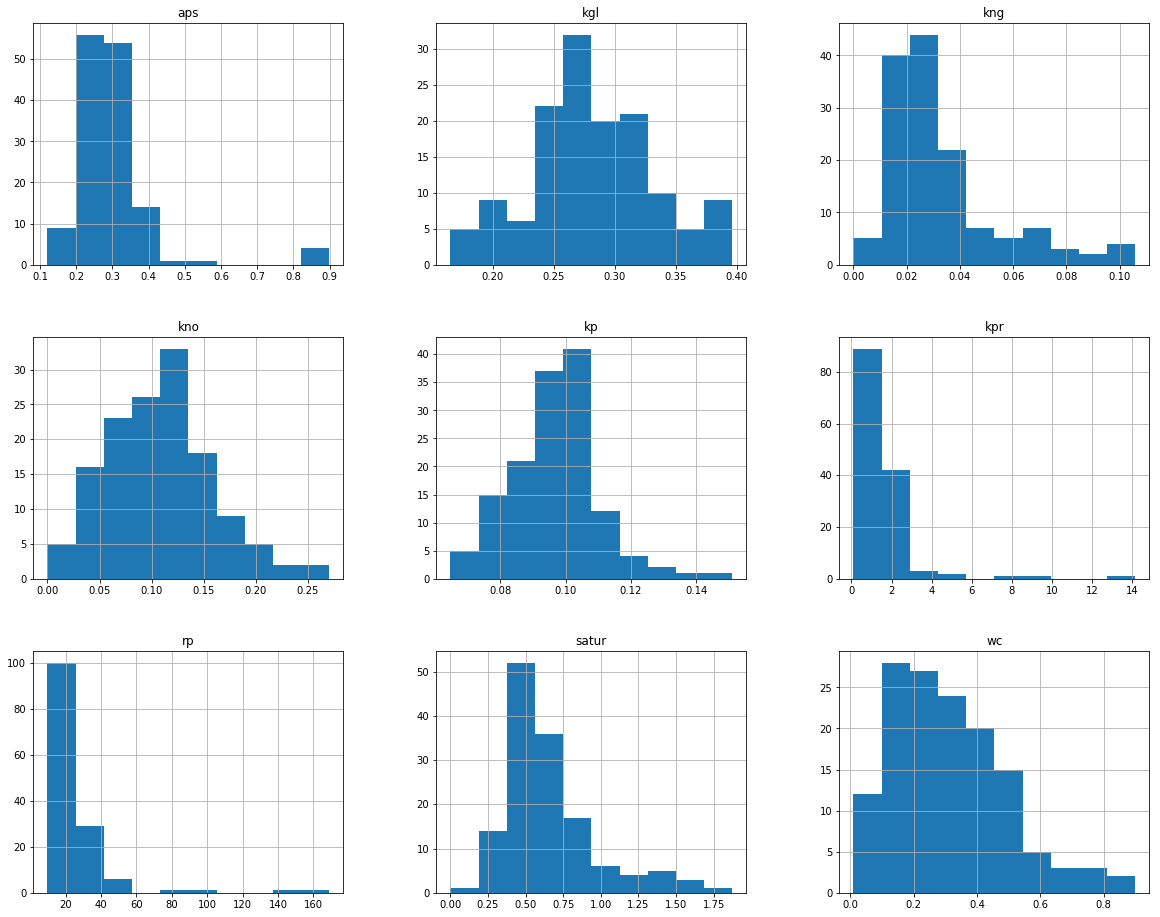

In [7]:
#fig, ax = plt.subplots()
#hist_data = data_for_analize[cols].hist(figsize=(800,800), ax=ax);
#fig.savefig(main.data_dir + '\\hist.png')
hist_data = data_for_analize[cols].hist(figsize=(20,16));
hist_data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003F232780F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000003F28C7EE80>]], dtype=object)

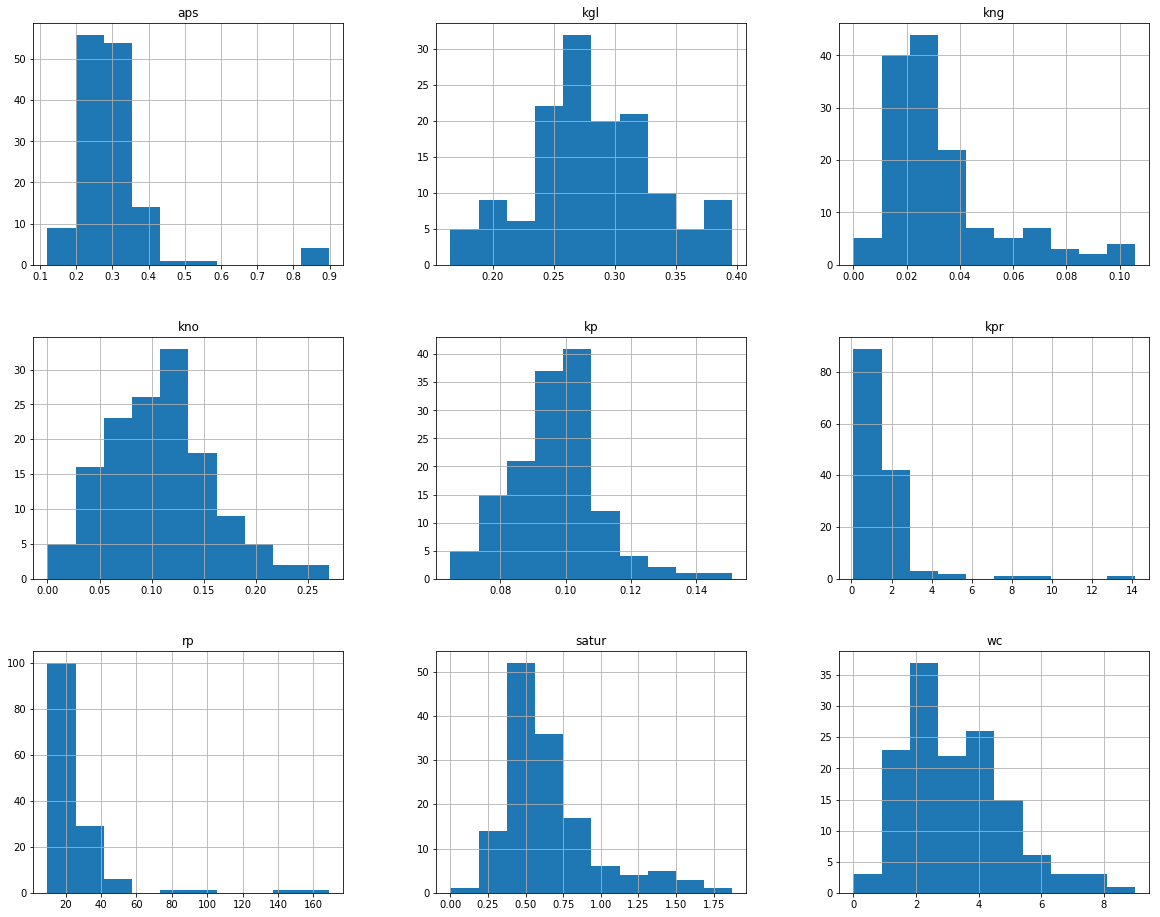

In [28]:
hist_data = data_for_analize_scale[cols].hist(figsize=(20,16));
hist_data

In [8]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [73]:
data_for_analize.columns
# преобразуем все признаки в числовые, выкинув штаты
X = data_for_analize.drop(['UWI', 'well_name', 'date_start', 'X-Coord', 'Y-Coord'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
X_scaled

array([[ 0.19431188, -1.74645911, -0.96798255, ..., -0.01088916,
        -0.29835307, -1.26533588],
       [-0.28970804, -0.68682954, -0.66216034, ..., -0.17500413,
        -0.64486533, -0.25225736],
       [-0.16151528, -0.65559668, -0.53600882, ...,  0.12885981,
        -0.70013096, -0.0271288 ],
       ..., 
       [ 0.84019632, -0.48392158,  1.4703524 , ...,  0.12918246,
         1.69416515, -0.98392518],
       [ 0.275747  ,  0.14519777,  3.36756685, ...,  0.07253633,
         2.33759964, -1.1527716 ],
       [-1.52249884,  2.25034514, -1.54226682, ..., -0.29244105,
        -2.06831512,  0.14171762]])

In [75]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 1.5 s


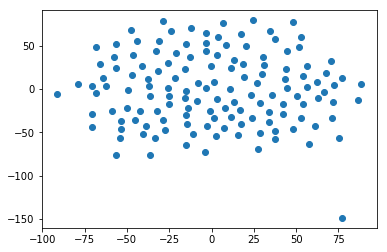

In [76]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

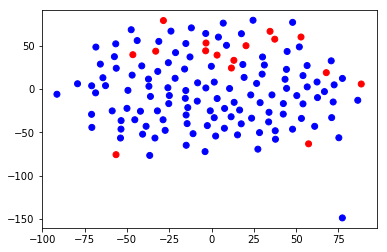

In [83]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=data_for_analize_scale['wc'].map({0: 'blue', 1:'blue', 2:'blue', 3:'blue', 4:'blue',
                                                                                                      5: 'red', 6:'red', 7:'red', 8:'red', 9:'red'}));